In [165]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pit
import os
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
print(train_data.isnull().sum())
train_data.head()
import plotly.express as px

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [181]:
data = {
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282'],
    'Fare': [7.25, 71.2833, 7.925],
    'Lifeboat': [None, 'C', None],
    'Home/Destination': ['New York, NY', 'Paris, France', 'London, UK'],
    'Survived': [0, 1, 1],
    'Sex': ['male', 'female', 'female']
}
df = pd.DataFrame(data)

df = df.drop(columns=['Ticket', 'Fare', 'Lifeboat', 'Home/Destination'])

print(df)

   Survived     Sex
0         0    male
1         1  female
2         1  female


In [177]:
data = {'Sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female'],
        'Survived': [0, 1, 1, 0, 0, 1, 0]}

print(df.describe())

       Survived
count  7.000000
mean   0.428571
std    0.534522
min    0.000000
25%    0.000000
50%    0.000000
75%    1.000000
max    1.000000


In [178]:
survial_rate = df['Survived'].mean()
print(f"Survival Rate: {survial_rate * 100:.2f}%")

Survival Rate: 42.86%


In [180]:
data = {
    'Sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female'],
    'Survived': [1, 0, 1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)
sex_survival = df.groupby('Sex')['Survived'].mean()
print(sex_survival)


Sex
female    0.500000
male      0.333333
Name: Survived, dtype: float64


In [169]:
data = {
    'SibSp': [1, 0, 2, 1, 0, 3, 1],
    'Parch': [0, 1, 0, 1, 0, 0, 1],
    'Survived': [1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
family_survival = df.groupby(['SibSp', 'Parch'])['Survived'].mean()
print(family_survival)

SibSp  Parch
0      0        0.0
       1        0.0
1      0        1.0
       1        1.0
2      0        1.0
3      0        0.0
Name: Survived, dtype: float64


In [170]:
data = {
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625],
    'Survived': [0, 1, 1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)

bins = [0, 10, 50, 100]
labels = ['0-10', '10-50', '50+']
df['Fare_binned'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)

fare_survival = df.groupby('Fare_binned')['Survived'].mean()


print(fare_survival)

Fare_binned
0-10     0.500000
10-50         NaN
50+      0.333333
Name: Survived, dtype: float64


C:\Users\302-15\AppData\Local\Temp\ipykernel_1696\3868821843.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



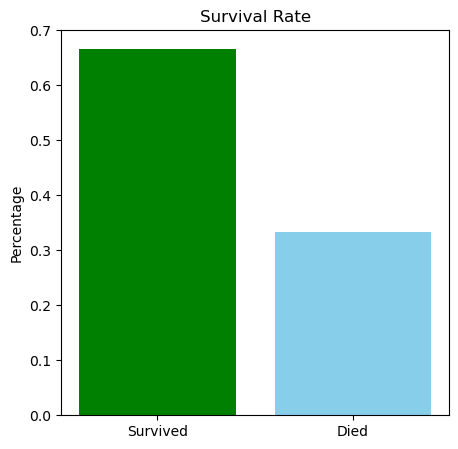

In [ ]:
survival_rate = df['Survived'].mean()

# 그래프 그리기
pit.figure(figsize=(3, 7))
pit.bar(['Survived', 'Died'], [survival_rate, 1 - survival_rate], color=['green', 'skyblue'])
pit.title('Survival Rate')
pit.ylabel('Percentage')
pit.show()

([<matplotlib.patches.Wedge at 0x1b960851cd0>,
 [Text(-0.9801071672559597, 0.49938956806635293, 'Survived'),
  Text(0.9801071204997298, -0.499389659830606, 'Died')],
 [Text(-0.5346039094123416, 0.2723943098543743, '35.0%'),
  Text(0.5346038839089434, -0.27239435990760325, '65.0%')])

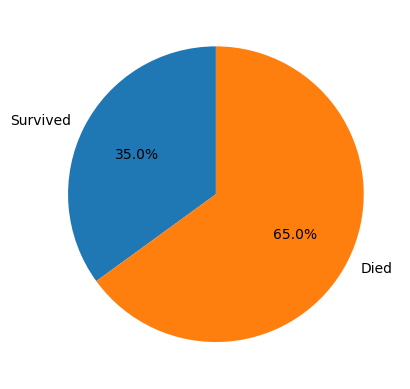

In [172]:
labels = ['Survived', 'Died']
sizes = [35, 65]
pit.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

In [173]:
import pandas as pd


data = {
    'Sex': ['male', 'female', 'female', 'male', 'male', 'female', 'female'],
    'Survived': [1, 0, 1, 0, 0, 1, 0]
}

df = pd.DataFrame(data)


male_survived = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])


print(f"남성 생존자 수: {male_survived}")


남성 생존자 수: 1


In [174]:
# 남성 총 수 계산
male_total = len(df[df['Sex'] == 'male'])

# 남성 생존율 계산
male_survival_rate = male_survived / male_total if male_total != 0 else 0

# 결과 출력
print(f"남성 생존율: {male_survival_rate:.2f}")


남성 생존율: 0.33


Index(['Sex', 'Survived'], dtype='object')
Male Survived: 0, Male Died: 3
Female Survived: 3, Female Died: 1
Male Survival Rate: 0.33


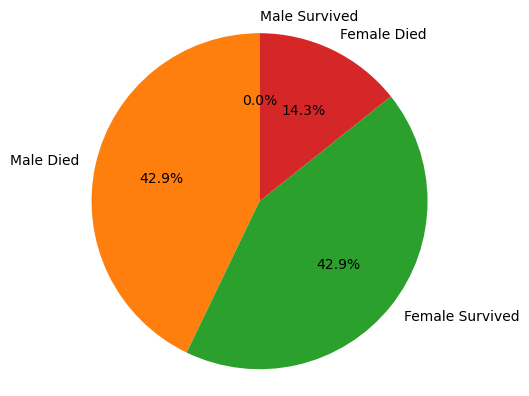

In [175]:
data = {'Sex':['male','female','female','male','male','female','female'],"Survived":[0,1,1,0,0,1,0]}

df = pd.DataFrame(data)

print(df.columns)

male_survived = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
male_died = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])

female_survived = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
female_died = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])

print(f"Male Survived: {male_survived}, Male Died: {male_died}")
print(f"Female Survived: {female_survived}, Female Died: {female_died}")
print(f"Male Survival Rate: {male_survival_rate:.2f}")


labels = ['Male Survived', 'Male Died', 'Female Survived', 'Female Died']
sizes = [male_survived, male_died, female_survived, female_died]

pit.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pit.axis('equal')
pit.show()


Index(['Sex', 'Survived'], dtype='object')


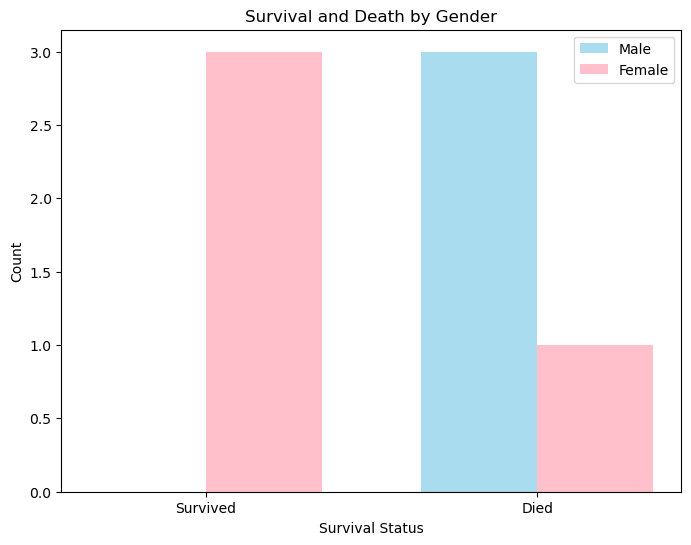

In [176]:
data = {'Sex':['male','female','female','male','male','female','female'],
        "Survived":[0,1,1,0,0,1,0]}

df = pd.DataFrame(data)

print(df.columns)

male_survived = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
male_died = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])

female_survived = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
female_died = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])

labels = ['Survived', 'Died']
male_counts = [male_survived, male_died]
female_counts = [female_survived, female_died]

fig, ax = pit.subplots(figsize=(8, 6))

bar_width = 0.35  
index = range(len(labels))

ax.bar(index, male_counts, bar_width, label='Male', color='skyblue', alpha=0.7)

ax.bar([p + bar_width for p in index], female_counts, bar_width, label='Female', color='pink')

ax.set_xlabel('Survival Status')
ax.set_ylabel('Count')
ax.set_title('Survival and Death by Gender')
ax.set_xticks([p + bar_width / 2 for p in index])  
ax.set_xticklabels(labels)  
ax.legend()  


pit.show()